# Test of changes in `141-l-max-col-dr`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from time import time
from classy import Class
font = {'size'   : 22}
matplotlib.rc("font", **font)
matplotlib.rc(["text.usetex", True])

omega_g = 2.47298e-5  # Always this unless explicitly changed
omega_dncdmdr = (0.0 + 0.5)*7/8*(4/11)**(4/3)*omega_g # This values ensures a contribution DeltaNeff=0.5 today
Mpc_over_m = 3.085677581282e22
c          = 2.99792458e+8
k_B        = 1.38065e-23
eV         = 1.602e-19 # 1 eV in Joule
T_cmb      = 2.7254
T0         = (4/11)**(1/3)

from scipy.interpolate import interp1d
def interp_onto(xdata, ydata, new_xdata):
    return interp1d(xdata, ydata, fill_value="extrapolate")(new_xdata)

In [2]:
perts = {}
k_plot   = 0.2 # k to plot perturbations for, in 1/Mpc
k_max    = 1.0
l_max_dr = 17
LCDM_settings = {
    'output'           : 'tCl, lCl, mPk',
    'lensing'          : 'yes',
    'k_output_values'  : k_plot,
    'P_k_max_1/Mpc'    : k_max,
    'background_method': 0,
    'evolver'          : 1,

    'omega_b'          : 0.02238280,
    'omega_cdm'        : 0.1201075,
    'omega_g'          : omega_g,
    'N_eff'            : 3.046,
    'YHe'              : 0.2454006,
    'tau_reio'         : 0.05430842,
    'n_s'              : 0.9660499,
    'A_s'              : 2.100549e-09
}
LCDM = Class(LCDM_settings).compute()
dncdm_basic = {
    'omega_dncdmdr'     : omega_dncdmdr,
    'background_method' : 0,
    'N_ncdm_decay_dr'   : 1,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'maximum_q_ncdm_decay_dr'          : 15,
    'N_momentum_bins_ncdm_decay_dr'    : 5,
    'l_max_dr'                         : l_max_dr,
    'l_max_ncdm'                       : l_max_dr,
    'ncdm_fluid_approximation'         : 3
}

In [3]:
mass  = 1.0
Gamma = 1e+8
max_l_cols = [3, 5, 7, 9, 11, 13, 15, 17]
max_l_cols = [3, 7, 11, 13, 15, l_max_dr]
max_l_cols = [3, 7, 13, l_max_dr]
models, times = [], []
for l_max_dr_col in max_l_cols:
    begin_time = time()
    models.append(Class(LCDM_settings | dncdm_basic | {'l_max_dr_col':l_max_dr_col, 'm_ncdm_decay_dr':mass, 'Gamma_ncdm_decay_dr':Gamma}).compute())
    times.append(time() - begin_time)
    print(f"Computed with l_max_dr_col={l_max_dr_col} in {times[-1]:.3} seconds.")

Computed with l_max_dr_col=3 in 11.1 seconds.
Computed with l_max_dr_col=7 in 10.9 seconds.
Computed with l_max_dr_col=13 in 12.5 seconds.
Computed with l_max_dr_col=17 in 13.0 seconds.


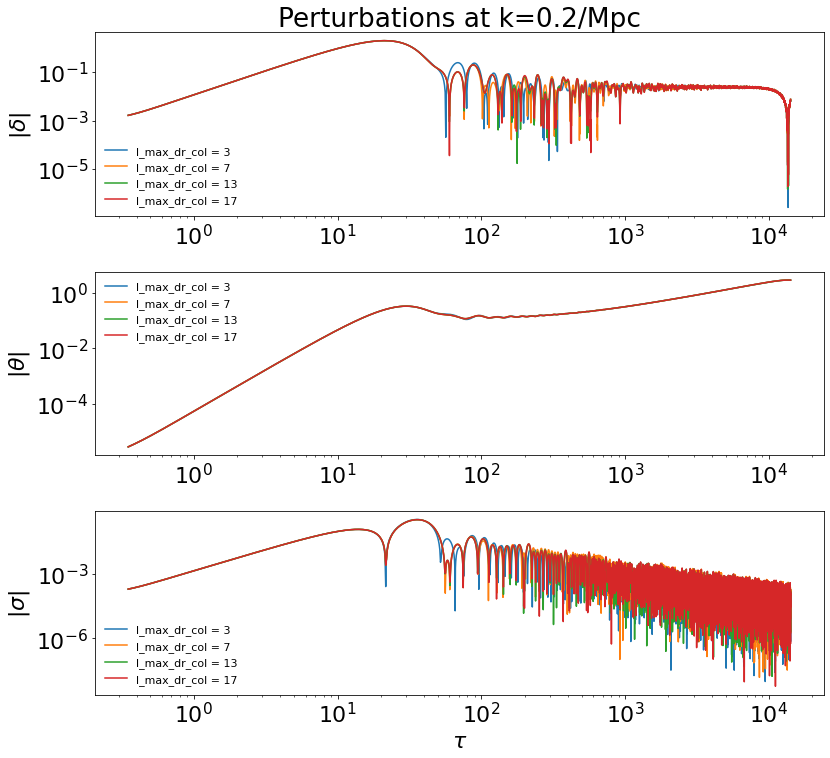

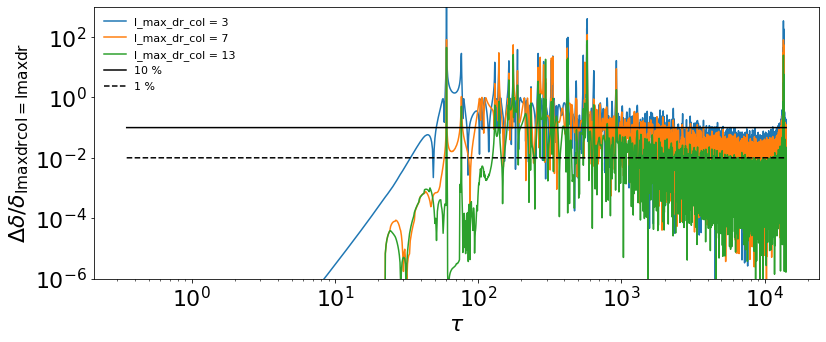

In [4]:
fig, ax = plt.subplots(3,1, figsize=[12, 11])
ax[0].set_title(f'Perturbations at k={k_plot}/Mpc')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$|\delta|$')
# ax[0].set_xlabel(r'$k \tau$')
for idx, clas in enumerate(models):
    pert = clas.get_perturbations()['scalar'][0]
    tau = pert['tau [Mpc]']
    ax[0].plot(tau, np.abs(pert['delta_dr[0]']), '-', label=f"l_max_dr_col = {max_l_cols[idx]}")
    ax[1].plot(tau, np.abs(pert['theta_dr[0]']), '-', label=f"l_max_dr_col = {max_l_cols[idx]}")
    ax[2].plot(tau, np.abs(pert['shear_dr[0]']), '-', label=f"l_max_dr_col = {max_l_cols[idx]}")
ax[0].legend(frameon=False, fontsize=11)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$|\theta|$')
ax[1].legend(frameon=False, fontsize=11)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_ylabel(r'$|\sigma|$')
ax[2].set_xlabel(r'$\tau$')
ax[2].legend(frameon=False, fontsize=11)
fig.tight_layout()

fig, ax = plt.subplots(1,1, figsize=[13, 5])
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_ylabel(r'$\Delta \delta / \delta_{\mathrm{l max dr col=l max dr}}$')
ax.set_xlabel(r'$\tau$')

pert_ref   = models[-1].get_perturbations()['scalar'][0]
tau        = pert_ref['tau [Mpc]']
delta_good = np.abs(pert_ref['delta_dr[0]'])
for idx, clas in enumerate(models[:-1]):
    pert = clas.get_perturbations()['scalar'][0]
    ax.plot(tau, np.abs((interp_onto(pert['tau [Mpc]'], np.abs(pert['delta_dr[0]']), tau) - delta_good)/delta_good), '-', label=f"l_max_dr_col = {max_l_cols[idx]}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(tau, 0.1*np.ones(len(tau)), 'k-', label='10 %')
ax.plot(tau, 0.01*np.ones(len(tau)), 'k--', label='1 %')
ax.set(ylim=[1e-6, 1e+3])
ax.legend(frameon=False, fontsize=11);

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_29731/3582025638.py:19: RuntimeWarning: invalid value encountered in double_scalars
  y_out.append(np.sum(y[idx_tau:tau_next_idx])/(tau_next_idx - idx_tau))
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_29731/3582025638.py:19: RuntimeWarning: invalid value encountered in double_scalars
  y_out.append(np.sum(y[idx_tau:tau_next_idx])/(tau_next_idx - idx_tau))
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_29731/3582025638.py:19: RuntimeWarning: invalid value encountered in double_scalars
  y_out.append(np.sum(y[idx_tau:tau_next_idx])/(tau_next_idx - idx_tau))
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_29731/3582025638.py:19: RuntimeWarning: invalid value encountered in double_scalars
  y_out.append(np.sum(y[idx_tau:tau_next_idx])/(tau_next_idx - idx_tau))
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_29731/3582025638.py:19: RuntimeWarning: invalid value encountered in double_s

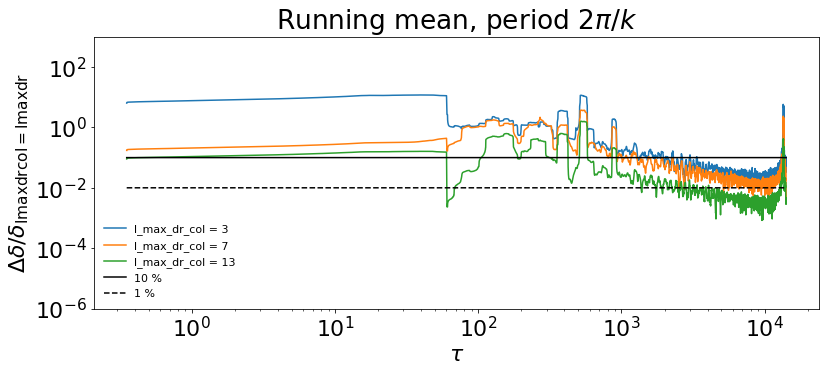

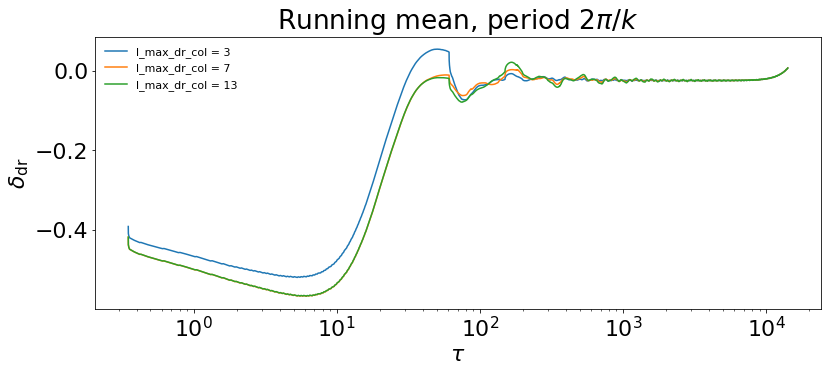

In [12]:
from scipy.interpolate import interp1d
def interp_onto(xdata, ydata, new_xdata):
    return interp1d(xdata, ydata, fill_value="extrapolate")(new_xdata)
def quickMean(tau, y, tau_period):
    tau_running_idx = 0
    tau_running     = tau[0]
    tau_out, y_out  = [], []
    while tau_running < tau[-1]:
        tau_out.append(tau_running)
        tau_next_idx = np.argmin(np.abs(tau_running + tau_period - tau))
        y_out.append(np.sum(y[tau_running_idx:tau_next_idx])/(tau_next_idx - tau_running_idx))
        tau_running_idx = tau_next_idx
        tau_running     = tau[tau_running_idx]
    return tau_out, y_out
def runningMean(tau, y, tau_period):
    y_out           = []
    for idx_tau, t in enumerate(tau):
        tau_next_idx = np.argmin(np.abs(t + tau_period - tau))
        y_out.append(np.sum(y[idx_tau:tau_next_idx])/(tau_next_idx - idx_tau))
    return y_out
period = 2*2*np.pi/k_plot
tau_uniform = np.logspace(np.log(tau[0]), np.log(tau[-1]), 3*len(tau))

fig, ax = plt.subplots(1,1, figsize=[13, 5])
ax.set_title('Running mean, period $2\pi/k$')
ax.set_ylabel(r'$\Delta \delta / \delta_{\mathrm{l max dr col=l max dr}}$')
ax.set_xlabel(r'$\tau$')
for idx, clas in enumerate(models[:-1]):
    pert = clas.get_perturbations()['scalar'][0]
    error = np.abs((interp_onto(pert['tau [Mpc]'], np.abs(pert['delta_dr[0]']), tau) - delta_good)/delta_good)
    y = runningMean(tau, error, period)
    ax.plot(tau, y, '-', label=f"l_max_dr_col = {max_l_cols[idx]}")
#    error_interp = interp_onto(tau, error, tau_uniform)
#    y = runningMean(tau_uniform, error_interp, period)
#    ax.plot(tau_uniform, y, '-', label=f"l_max_dr_col = {max_l_cols[idx]}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(tau, 0.1*np.ones(len(tau)), 'k-', label='10 %')
ax.plot(tau, 0.01*np.ones(len(tau)), 'k--', label='1 %')
ax.set(ylim=[1e-6, 1e+3])
ax.legend(frameon=False, fontsize=11);

fig, ax = plt.subplots(1,1, figsize=[13, 5])
ax.set_title('Running mean, period $2\pi/k$')
ax.set_ylabel(r'$\delta_{\mathrm{dr}}$')
ax.set_xlabel(r'$\tau$')
for idx, clas in enumerate(models[:-1]):
    pert = clas.get_perturbations()['scalar'][0]
    delta_test = interp_onto(pert['tau [Mpc]'], pert['delta_dr[0]'], tau)
#    ax.plot(tau, delta_test, '-', label=f"l_max_dr_col = {max_l_cols[2]}")
    y = runningMean(tau, delta_test, period)
    ax.plot(tau, y, '-', label=f"l_max_dr_col = {max_l_cols[idx]}")
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set(ylim=[1e-6, 1e+3])
ax.legend(frameon=False, fontsize=11);

## Timing

In [ ]:
mass  = 1.0
Gamma = 1e+8
Nbins = [5, 10, 20]
max_l_cols = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, l_max_dr]
models, times = [], []
for Nbin in Nbins:
    new_models, new_times = [], []
    for l_max_dr_col in max_l_cols:
        begin_time = time()
        new_models.append(Class(LCDM_settings | dncdm_basic | {'l_max_dr_col':l_max_dr_col, 'm_ncdm_decay_dr':mass, 'Gamma_ncdm_decay_dr':Gamma}).compute())
        new_times.append(time() - begin_time)
#        print(f"Computed with {Nbin} bins and l_max_dr_col={l_max_dr_col} in {new_times[-1]:.3} seconds.")
    models.append(new_models)
    times.append(new_times)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=[12, 7])
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r'l_max_dr_col')
ax.set_ylabel(r'Computation time [s]')
for idx, Nbin in enumerate(Nbins):
    ax.plot(max_l_cols, times[idx], '-', label=f'Nbins = {Nbin}')
ax.legend(frameon=False, fontsize=12)

In [ ]:
def get_spectrum(class_instance, lensing=True):
    if lensing:
        cls  = class_instance.lensed_cl(2500)
    else:
        cls  = class_instance.raw_cl(2500)
    ll   = cls['ell'][2:]
    clTT = cls['tt'][2:]
    cl   = clTT*ll*(ll+1)/2./np.pi
    return ll, cl

def error_cl(class_test, class_ref):
    ll_test, cl_test = get_spectrum(class_test)
    ll_ref,  cl_ref  = get_spectrum(class_ref)
    return ll_test, (cl_ref - cl_test)/cl_test

fig, ax = plt.subplots(1,1, figsize=[12, 7])
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r'l_max_dr_col')
ax.set_ylabel(r'Max relative error in $C_\ell$')
for idx, Nbin in enumerate(Nbins[:]):
    errors = [max(np.abs(error_cl(models[idx][i], models[idx][-1])[1])) for i in range(len(max_l_cols))]
    ax.plot(max_l_cols, errors, '-', label=f'Nbins = {Nbin}')
ax.legend(frameon=False, fontsize=12)
print(errors)